<h1 align=center><font size = 8><strong>Exemplo regressão linear univariada</strong></font></h1>

In [3]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = np.loadtxt("dataset_regressao01.txt", dtype = float, delimiter = ',')

In [8]:
X = data[:,0]
Y = data[:,1]

In [11]:
X[0:10]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781,
       6.4862, 5.0546])

In [12]:
Y[0:10]

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233, 11.886 ,  4.3483,
       12.    ,  6.5987,  3.8166])

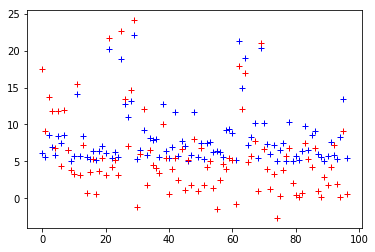

In [10]:
plt.plot(X,"b+")
plt.plot(Y,"r+")
plt.show()

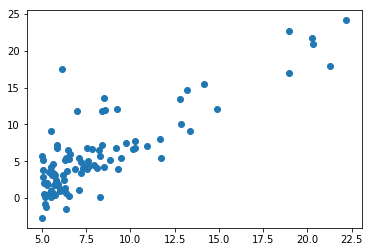

In [13]:
plt.scatter(X,Y)
plt.show()

In [14]:
x = np.ones((data.shape[0],2))
x[:,1] = X
y = Y

In [15]:
x[:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [45]:
# Separando os labels em conjuntos de treino e teste
X_train = x[:-20]
X_test =  x[-20:]

In [46]:
# Separando os labels em conjuntos de treino e teste
y_train = y[:-20]
y_test = y[-20:]

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((57, 2), (57,), (20, 2), (20,))

In [48]:
w = np.zeros((2,1))
print(w[0])
print(len(w))

[0.]
2


In [49]:
#Setar o alpha
alpha = 0.0005
n_epochs = 1000
n = X_train.shape[0]
eqm = []

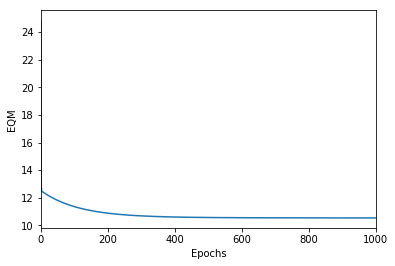

In [50]:
for i in range(n_epochs):
    ind = np.random.permutation(n)
    x = X_train[ind,:]
    y = y_train[ind]
    erro_total = 0
    for j in range(n):
        y_barra = np.matmul(X_train[j,:],w)
        erro = y_train[j] - y_barra[0]
        erro_total = erro_total + ((erro*erro))
        w[0] = w[0] + (alpha*erro)
        w[1] = w[1] + (alpha*erro*X_train[j,1])
    eqm.append(erro_total/float(n))
    
eixo_x = range(0,n_epochs)

plt.plot(eixo_x,eqm)
plt.ylabel("EQM")
plt.xlim((0,n_epochs))
plt.xlabel("Epochs")
plt.show()

In [51]:
a,b = w[0],w[1]


In [52]:
print(a)
print(b)

[-3.20398612]
[1.09468261]


In [53]:
y_pred = (b*X_test[:,1])+a

In [54]:
y_pred

array([ 2.933133  ,  3.04741787,  3.89634423,  5.11899524, 12.30109838,
       17.53477595, 19.06295287,  4.53629569, 18.98523041,  2.84709095,
        3.14670558,  3.72108555,  5.36157691, 17.5501015 ,  3.96388615,
        3.66427152,  3.72841992,  5.97262874,  2.54572483,  3.21063504])

In [55]:
mse = np.mean((y_test - y_pred)**2)

In [56]:
mse

9.194410572342175

In [57]:
eqm[-1]

10.539421400559412

----------------------------------------------

<h1 align=center><font size = 8><strong>Exemplo regressão linear univariada com Scikit Learn</strong></font></h1>


<a href="https://scikit-learn.org/stable/"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png" width = 250, align = "center"></a>

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [121]:
data = np.loadtxt("dataset_regressao01.txt", dtype = float, delimiter = ',')

In [122]:
X = data[:,0]
Y = data[:,1]

In [123]:
print("Shape de x:",X.shape)
print("Shape de y:",Y.shape)

Shape de x: (97,)
Shape de y: (97,)


In [124]:
# Separando os labels em conjuntos de treino e teste
X_train = X[:-20]
X_test =  X[-20:]

In [125]:
# Separando os labels em conjuntos de treino e teste
y_train = Y[:-20]
y_test = Y[-20:]

In [126]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [127]:
# regr vai ser nosso objeto da regressão linear
regr = linear_model.LinearRegression()

In [128]:
# Vamos agora dar o "fit" para treinar com os conjuntos de treino 
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
# Usar o .predict para extrair as prediçoes usando o conjunto de teste
y_pred = regr.predict(X_test)

In [130]:
# Coeficiente
print('Coefficients: \n', regr.intercept_, regr.coef_)

Coefficients: 
 -3.639639254766422 [1.19367575]


In [131]:
# Erro médio quadrado
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

Mean squared error: 6.59


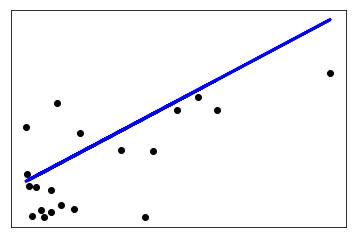

In [132]:
# Imprimir saídas
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

--------------------------------

<h1 align=center><font size = 8><strong>Exemplo regressão linear multivariada</strong></font></h1>

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline

In [134]:
data = np.loadtxt("dataset_regressao02.txt", dtype = float)

In [137]:
data[:10,:]

array([[2.104  , 3.     , 3.999  ],
       [1.6    , 3.     , 3.299  ],
       [2.4    , 3.     , 3.69   ],
       [1.416  , 2.     , 2.32   ],
       [3.     , 4.     , 5.399  ],
       [1.985  , 4.     , 2.999  ],
       [1.534  , 3.     , 3.149  ],
       [1.427  , 3.     , 1.98999],
       [1.38   , 3.     , 2.12   ],
       [1.494  , 3.     , 2.425  ]])

In [138]:
var = data[:,0:2]
Y = data[:,2]

In [139]:
x = np.ones((data.shape[0],data.shape[1]))

In [140]:
x[:,1:3] = var
y = Y

In [141]:
print(x[:10,:])
print(y[:10])

[[1.    2.104 3.   ]
 [1.    1.6   3.   ]
 [1.    2.4   3.   ]
 [1.    1.416 2.   ]
 [1.    3.    4.   ]
 [1.    1.985 4.   ]
 [1.    1.534 3.   ]
 [1.    1.427 3.   ]
 [1.    1.38  3.   ]
 [1.    1.494 3.   ]]
[3.999   3.299   3.69    2.32    5.399   2.999   3.149   1.98999 2.12
 2.425  ]


In [142]:
X_train = x[:-20]
X_test =  x[-20:]

In [143]:
y_train = y[:-20]
y_test = y[-20:]

In [144]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27, 3), (27,), (20, 3), (20,))

In [145]:
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [152]:
w.shape

(3,)

In [146]:
wizz = np.zeros((3,1))

In [147]:
wizz[:,0] = w

In [153]:
wizz.shape

(3, 1)

In [148]:
print(wizz)

[[0.31679814]
 [1.43620754]
 [0.08517081]]


In [149]:
y_predict = (X_test).dot(wizz)

In [154]:
y_predict.shape, y_test.shape

((20, 1), (20,))

In [155]:
y_predict = np.reshape(y_predict,(20))

In [156]:
y_predict.shape

(20,)

In [157]:
mse = np.mean((y_test - y_predict)**2)

In [158]:
mse

0.4739542362770156

----------------------------



<h1 align=center><font size = 8><strong>Exemplo regressão linear multivariada com scikit learn</strong></font></h1>

<a href="https://scikit-learn.org/stable/"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png" width = 250, align = "center"></a>

Métricas:
    - mean squared error:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [160]:
data = np.loadtxt("dataset_regressao02.txt", dtype = float)

In [161]:
X = data[:,0:2]
Y = data[:,2]

In [162]:
print("Shape de x:",x.shape)
print("Shape de y:",y.shape)

Shape de x: (47, 3)
Shape de y: (47,)


In [163]:
# Separando os labels em conjuntos de treino e teste
X_train = X[:-20]
X_test =  X[-20:]

In [164]:
# Separando os labels em conjuntos de treino e teste
y_train = y[:-20]
y_test = y[-20:]

In [165]:
# regr vai ser nosso objeto da regressão linear
regr = linear_model.LinearRegression()

In [166]:
# Vamos agora dar o "fit" para treinar com os conjuntos de treino 
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [167]:
# Usar o .predict para extrair as prediçoes usando o conjunto de teste
y_pred = regr.predict(X_test)

In [168]:
# Coeficiente
print('Coefficients: \n', regr.coef_, regr.intercept_)

Coefficients: 
 [1.43620754 0.08517081] 0.316798143944788


In [169]:
# Erro médio quadrado
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

Mean squared error: 0.47


-------------------------------